In [8]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
from torchvision.transforms import ToTensor, ToPILImage
from torch.utils.data import Dataset, DataLoader
import cv2
from data import get_data

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = get_data()


In [202]:
X, y = data[0]


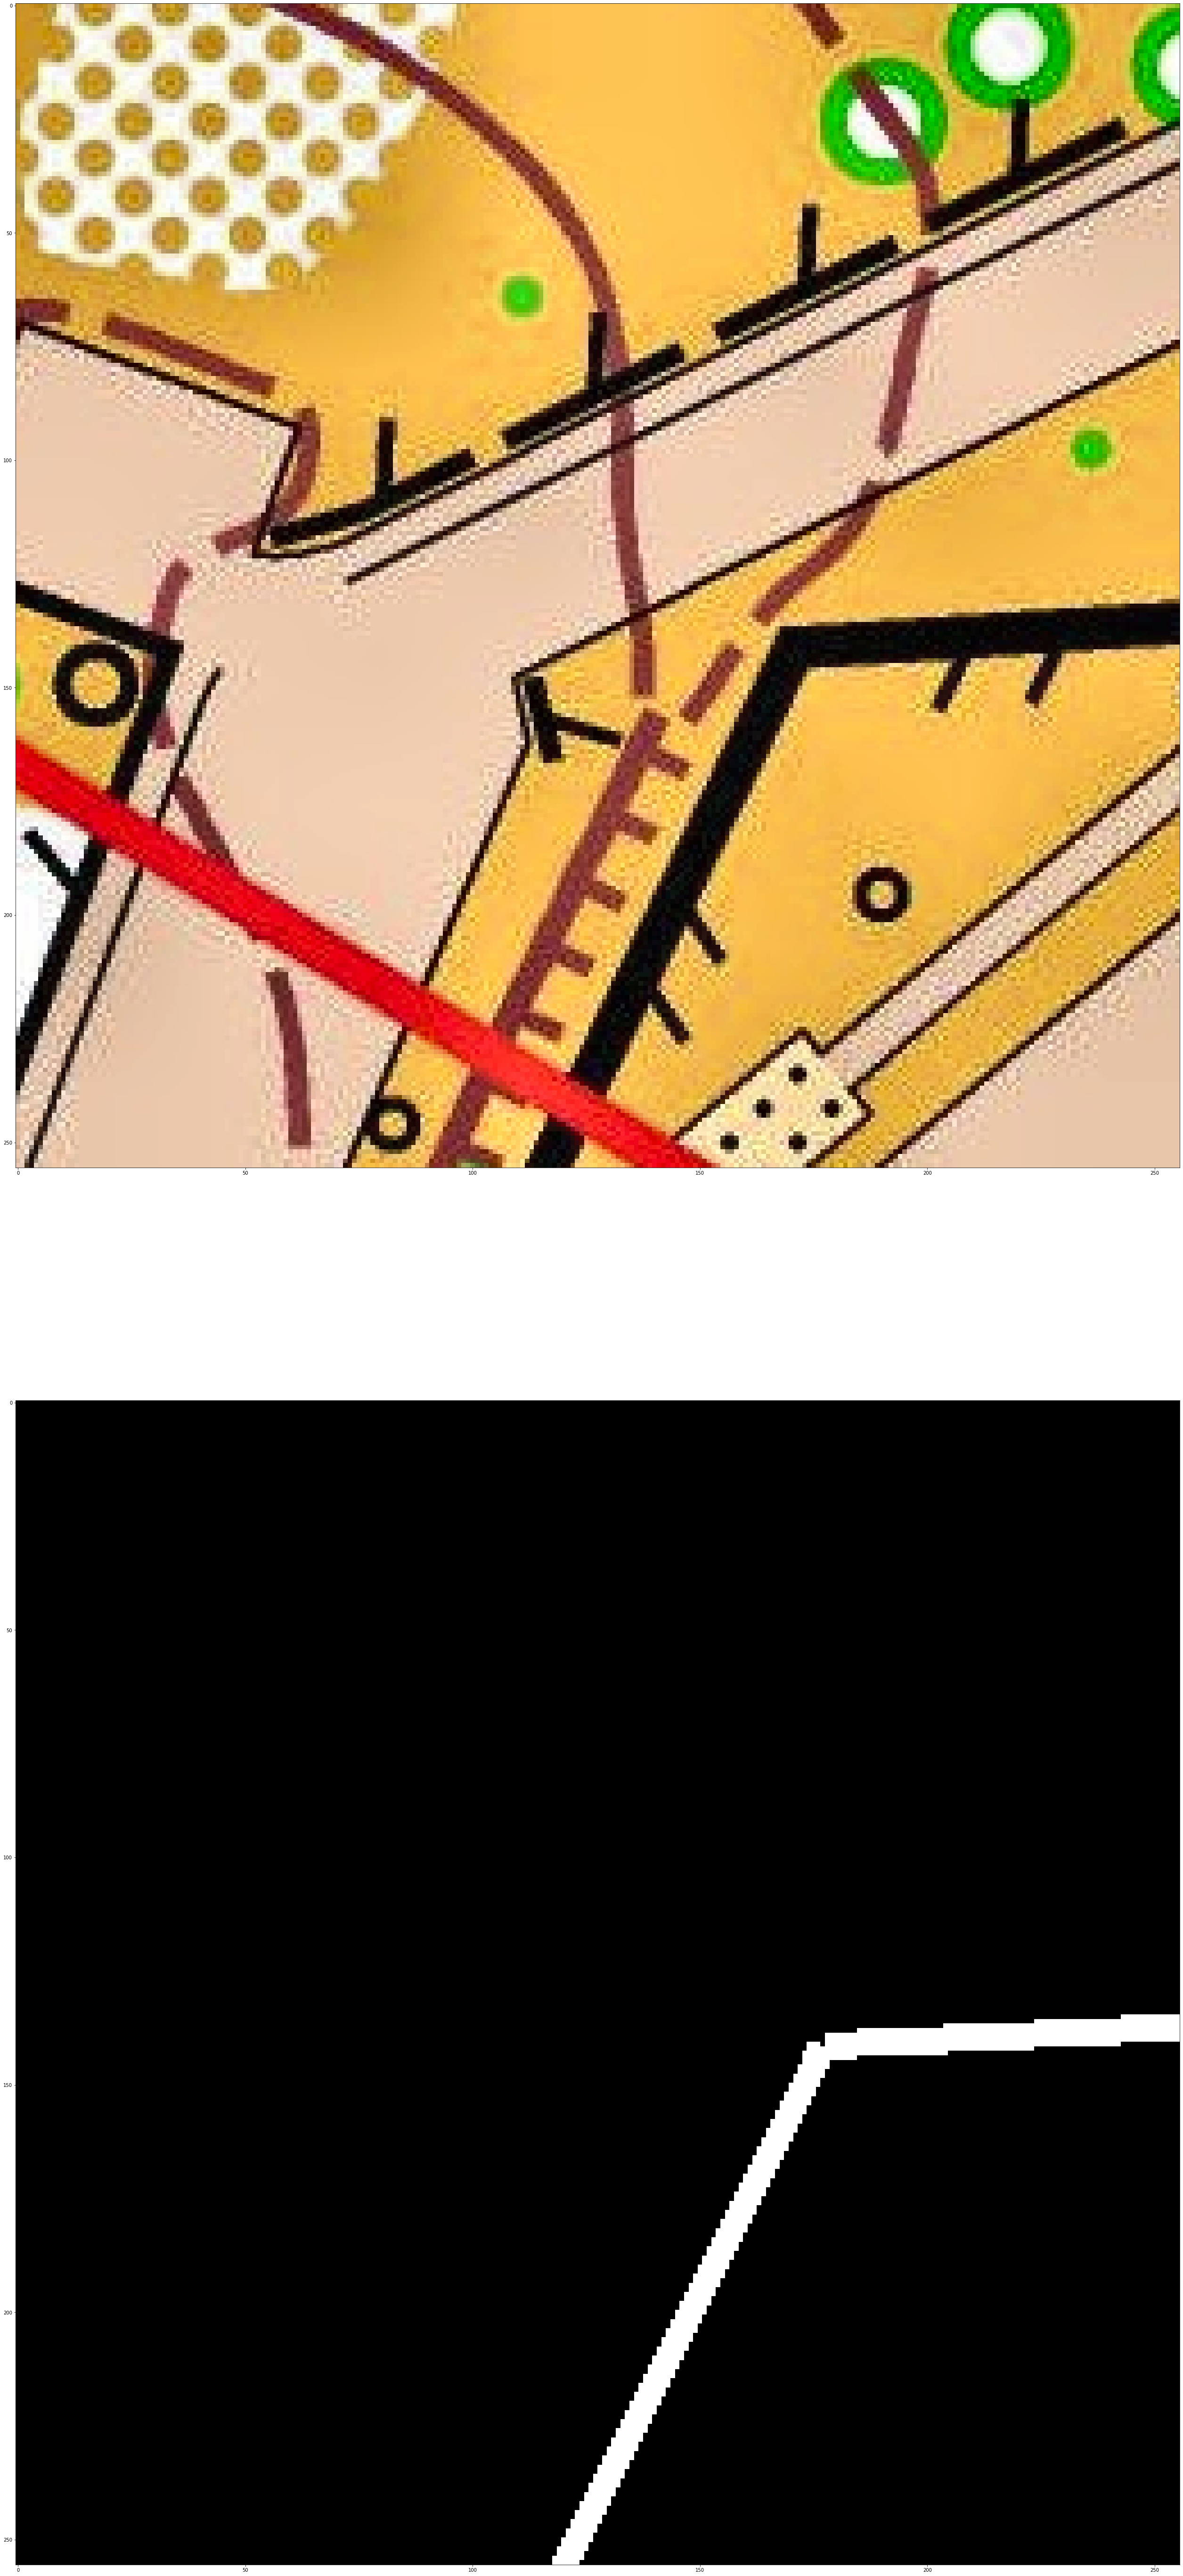

In [203]:
fig = plt.figure(figsize=(100, 100))
X = X.view(1, 3, 256, 256)
fig.add_subplot(2, 1, 1)
plt.imshow(X[0].permute(1, 2, 0).detach().numpy())
fig.add_subplot(2, 1, 2)
plt.imshow(y[0], cmap='gray')

In [204]:
def gen_point(shape):
    return [np.random.random() * shape[0], np.random.random() * shape[1]]
g = y[0].clone()
start = gen_point(g.shape)#(31, 192) #gen_point(g.shape)
finish = gen_point(g.shape)#(162, 37) #gen_point(g.shape)
start, finish

([17.146100859928225, 222.17449244159977],
 [146.12614693367587, 12.697684564190126])

In [205]:
from matplotlib.patches import Rectangle

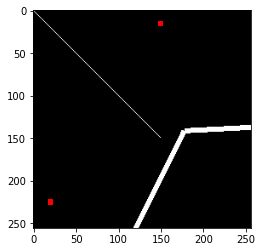

In [224]:
plt.imshow(g, cmap='gray')
plt.gca().add_patch(
 Rectangle(
    start,
    5,
    5,
    fill=True,color='red'      # remove background
 ) ) 
plt.gca().add_patch(
 Rectangle(
    finish,
    5,
    5,
    fill=True, color='red'      # remove background
 ) ) 

In [272]:
dist = np.zeros(g.shape)

In [273]:
dist.fill(np.infty)

In [274]:
import heapq
def astar(g, dist, start, finish):
    def findist(x, y, finish):
        return np.sqrt((x - finish[0]) ** 2 + (y - finish[1]) ** 2)
    points = []
    start[0] = int(start[0])
    start[1] = int(start[1])
    finish[0] = int(finish[0])
    finish[1] = int(finish[1])
    print(start, finish)
    dist[start[0], start[1]] = 0
    prev = {(x, y): (-1, -1) for x in range(dist.shape[0]) for y in range(dist.shape[1])}
    used = set()
    for i, row in enumerate(dist):
        for j, val in enumerate(row):
            heapq.heappush(points, (val + findist(i, j, finish), (i, j)))
    while len(points) > 0:
        _, v = heapq.heappop(points)
        if v in used:
            continue
        x, y = v
        used.add(v)
        for dx in [0, -1, 1, 2, -2, 3, -3]:
            for dy in [0, 1, -1, 2, -2, 3, -3]:
                if x + dx < dist.shape[0] and x + dx >= 0 and y + dy < dist.shape[1] and y + dy >= 0 and dist[x + dx, y + dy] > dist[v] + np.sqrt(dx ** 2 + dy ** 2) and g[x + dx, y + dy] != 1:
                    dist[x + dx, y + dy] = dist[v] + np.sqrt(dx ** 2 + dy ** 2)
                    prev[(x + dx, y + dy)] = v
                    heapq.heappush(points, (dist[x + dx, y + dy] + findist(x + dx, y + dy, finish), (x + dx, y + dy)))
    optpath = []
    fincop = finish
    while fincop != start:
        optpath.append(fincop)
        if fincop == (-1, -1):
            break
        fincop = prev[(fincop[0], fincop[1])]
    return dist[finish[0], finish[1]], optpath

In [275]:
for i in range(150):
    g[i, i] = 1
    g[i, i + 1] = 1    
    g[i + 1, i] = 1
    g[i, i + 2] = 1    
    g[i + 2, i] = 1
    g[i, i + 3] = 1    
    g[i + 3, i] = 1
    g[i + 4, i] = 1
    g[i, i + 4] = 1
for i in range(230):
    g[50, i] = 1
    g[51, i] = 1
    g[52, i] = 1    
    g[53, i] = 1    
    g[54, i] = 1        
    g[55, i] = 1        

In [276]:
distpath, optpath = astar(g, dist, start, finish)
distpath, len(optpath)

[17, 222] [146, 12]


(303.2256340698714, 104)

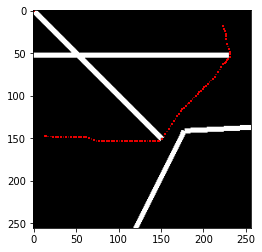

In [277]:
plt.imshow(g, cmap='gray')
for pnt in optpath:
    plt.gca().add_patch(
    Rectangle(
        pnt[::-1],
        1,
        1,
        fill=True,color='red'      # remove background
     ) ) 

Вау, выглядит хорошо для такого дискретного поля